## FINDING KEY CONNECTORS

In [37]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


In [38]:
print(users[0])

{'name': 'Hero', 'id': 0}


In [39]:
print(users[0:1])

[{'name': 'Hero', 'id': 0}]


In [40]:
# first give each user an empty list
for user in users:
    user["friends"] = []

# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

In [55]:
print(users[7]["friends"])

[{'name': 'Clive', 'friends': [{'name': 'Thor', 'friends': [{'name': 'Chi', 'friends': [{'name': 'Dunn', 'friends': [{'name': 'Hero', 'friends': [{...}, {'name': 'Sue', 'friends': [{...}, {...}, {...}], 'id': 2}], 'id': 0}, {'name': 'Sue', 'friends': [{'name': 'Hero', 'friends': [{...}, {...}], 'id': 0}, {...}, {...}], 'id': 2}, {...}], 'id': 1}, {'name': 'Sue', 'friends': [{'name': 'Hero', 'friends': [{'name': 'Dunn', 'friends': [{...}, {...}, {...}], 'id': 1}, {...}], 'id': 0}, {'name': 'Dunn', 'friends': [{'name': 'Hero', 'friends': [{...}, {...}], 'id': 0}, {...}, {...}], 'id': 1}, {...}], 'id': 2}, {...}], 'id': 3}, {...}], 'id': 4}, {'name': 'Hicks', 'friends': [{...}, {'name': 'Kate', 'friends': [{...}, {'name': 'Devin', 'friends': [...], 'id': 7}, {'name': 'Klein', 'friends': [{...}], 'id': 9}], 'id': 8}], 'id': 6}, {'name': 'Devin', 'friends': [...], 'id': 7}], 'id': 5}, {'name': 'Kate', 'friends': [{'name': 'Hicks', 'friends': [{'name': 'Clive', 'friends': [{'name': 'Thor', '

In [56]:
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

In [57]:
print(number_of_friends(users[7]))

2


In [50]:
total_connections = sum(number_of_friends(user) for user in users) # 24
print("total_connections=", total_connections)

total_connections= 24


In [43]:
num_users = len(users)
avg_connections = total_connections / num_users # 2.4
print("num_users=", num_users)
print("avg_connections=", avg_connections)

num_users= 11
avg_connections= 2.1818181818181817


In [90]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]
    
print("users sorted by number of friends:")
print(sorted(num_friends_by_id,
             key=lambda pair: pair[1],       # by number of friends
             reverse=True))                  # largest to smallest  

users sorted by number of friends:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1), (10, 0)]


## DATA SCIENTISTS YOU MAY KNOW

FOAF : Friend of a Friend

In [44]:
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

In [77]:
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])


In [72]:
print(not_the_same(users[1], users[2]) )

True


In [74]:
print(not_friends(users[1], users[2]))

False


In [76]:
from collections import Counter # not loaded by default
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


## Interests

In [58]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [59]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [60]:
print( data_scientists_who_like("Hadoop"))

[0, 9]


In [61]:
from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [63]:
print(user_ids_by_interest["Hadoop"])

[0, 9]


In [64]:
print(interests_by_user_id[7])

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']


In [82]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

print(most_common_interests_with(2))

Counter()


## Salaries and eXPerience

In [78]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

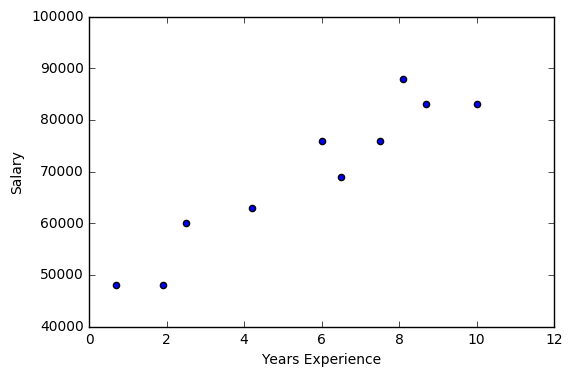

In [81]:
from matplotlib import pyplot as plt
make_chart_salaries_by_tenure()

In [83]:
# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
print(salary_by_tenure)

defaultdict(<class 'list'>, {0.7: [48000], 8.1: [88000], 2.5: [60000], 1.9: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 8.7: [83000], 4.2: [63000], 10: [83000]})


In [86]:
average_salary_by_tenure = {tenure : sum(salaries)/len(salaries)
                            for tenure, salaries in salary_by_tenure.items()}
print(average_salary_by_tenure)

{0.7: 48000.0, 1.9: 48000.0, 2.5: 60000.0, 4.2: 63000.0, 6.5: 69000.0, 6: 76000.0, 7.5: 76000.0, 8.1: 88000.0, 10: 83000.0, 8.7: 83000.0}


In [87]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}


## PAID_ACCOUNTS

In [88]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

## Topics of Interest

In [ ]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())